Step 2: Gaining an Understanding of the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/home/lola/machine-learning-project/clean_data.csv')
data = data.dropna()

In [4]:
plot_data = data.copy()

plot_data.loc[plot_data['Engine HP'] == 'not applicable', 'Engine HP'] = pd.NA
plot_data['Engine HP'] = pd.to_numeric(plot_data['Engine HP'], errors='coerce')

plot_data.loc[plot_data['Engine Cylinders'] == 'not applicable', 'Engine Cylinders'] = pd.NA
plot_data['Engine Cylinders'] = pd.to_numeric(plot_data['Engine Cylinders'], errors='coerce')

plot_data.loc[plot_data['Power'] == 'not applicable', 'Power'] = pd.NA
plot_data['Power'] = pd.to_numeric(plot_data['Power'], errors='coerce')


Visualization of the Target Variable

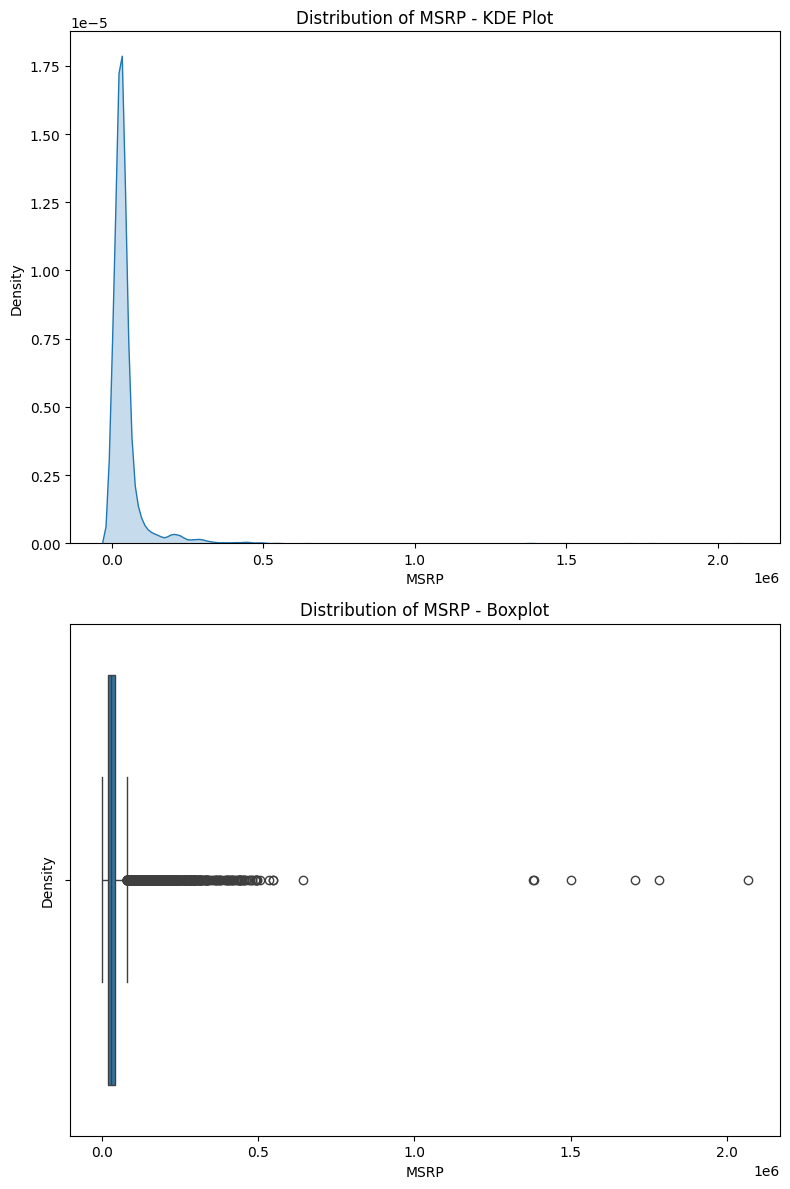

In [75]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

sns.kdeplot(plot_data['MSRP'], fill=True, ax=axes[0])
axes[0].set_xlabel('MSRP')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of MSRP - KDE Plot')

sns.boxplot(x=plot_data['MSRP'], ax=axes[1])
axes[1].set_xlabel('MSRP')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of MSRP - Boxplot')

plt.tight_layout()
plt.savefig('vis-target-variable.png')
plt.show()

In [76]:
mean_value = plot_data['MSRP'].mean()
median_value = plot_data['MSRP'].median()

print("Mean:", mean_value)
print("Median:", median_value)


Mean: 43618.05852942684
Median: 29999.0


In [73]:
top_20_msrp = plot_data.nlargest(20, 'MSRP')

table = pd.DataFrame({
    'Marke': top_20_msrp['Make'],
    'Modell': top_20_msrp['Model'],
    'Preis': top_20_msrp['MSRP']
})

table_style = (
    table.style
    .set_properties(**{'text-align': 'left'})
    .set_caption('Top 20 teuersten Fahrzeuge')
    .format({'Preis': '${:,.2f}'}) 
    .background_gradient(cmap='Blues', subset='Preis')  
)

table_style


,Marke,Modell,Preis
6180,Bugatti,Veyron 16.4,"$2,065,902.00"
6664,Bugatti,Veyron 16.4,"$1,782,951.00"
6181,Bugatti,Veyron 16.4,"$1,705,769.00"
4778,Lamborghini,Reventon,"$1,500,000.00"
3564,Maybach,Landaulet,"$1,382,750.00"
3563,Maybach,Landaulet,"$1,380,000.00"
2344,Ferrari,Enzo,"$643,330.00"
1048,Lamborghini,Aventador,"$548,800.00"
1052,Lamborghini,Aventador,"$548,800.00"
1055,Lamborghini,Aventador,"$535,500.00"


Visualization of the Independent Variables

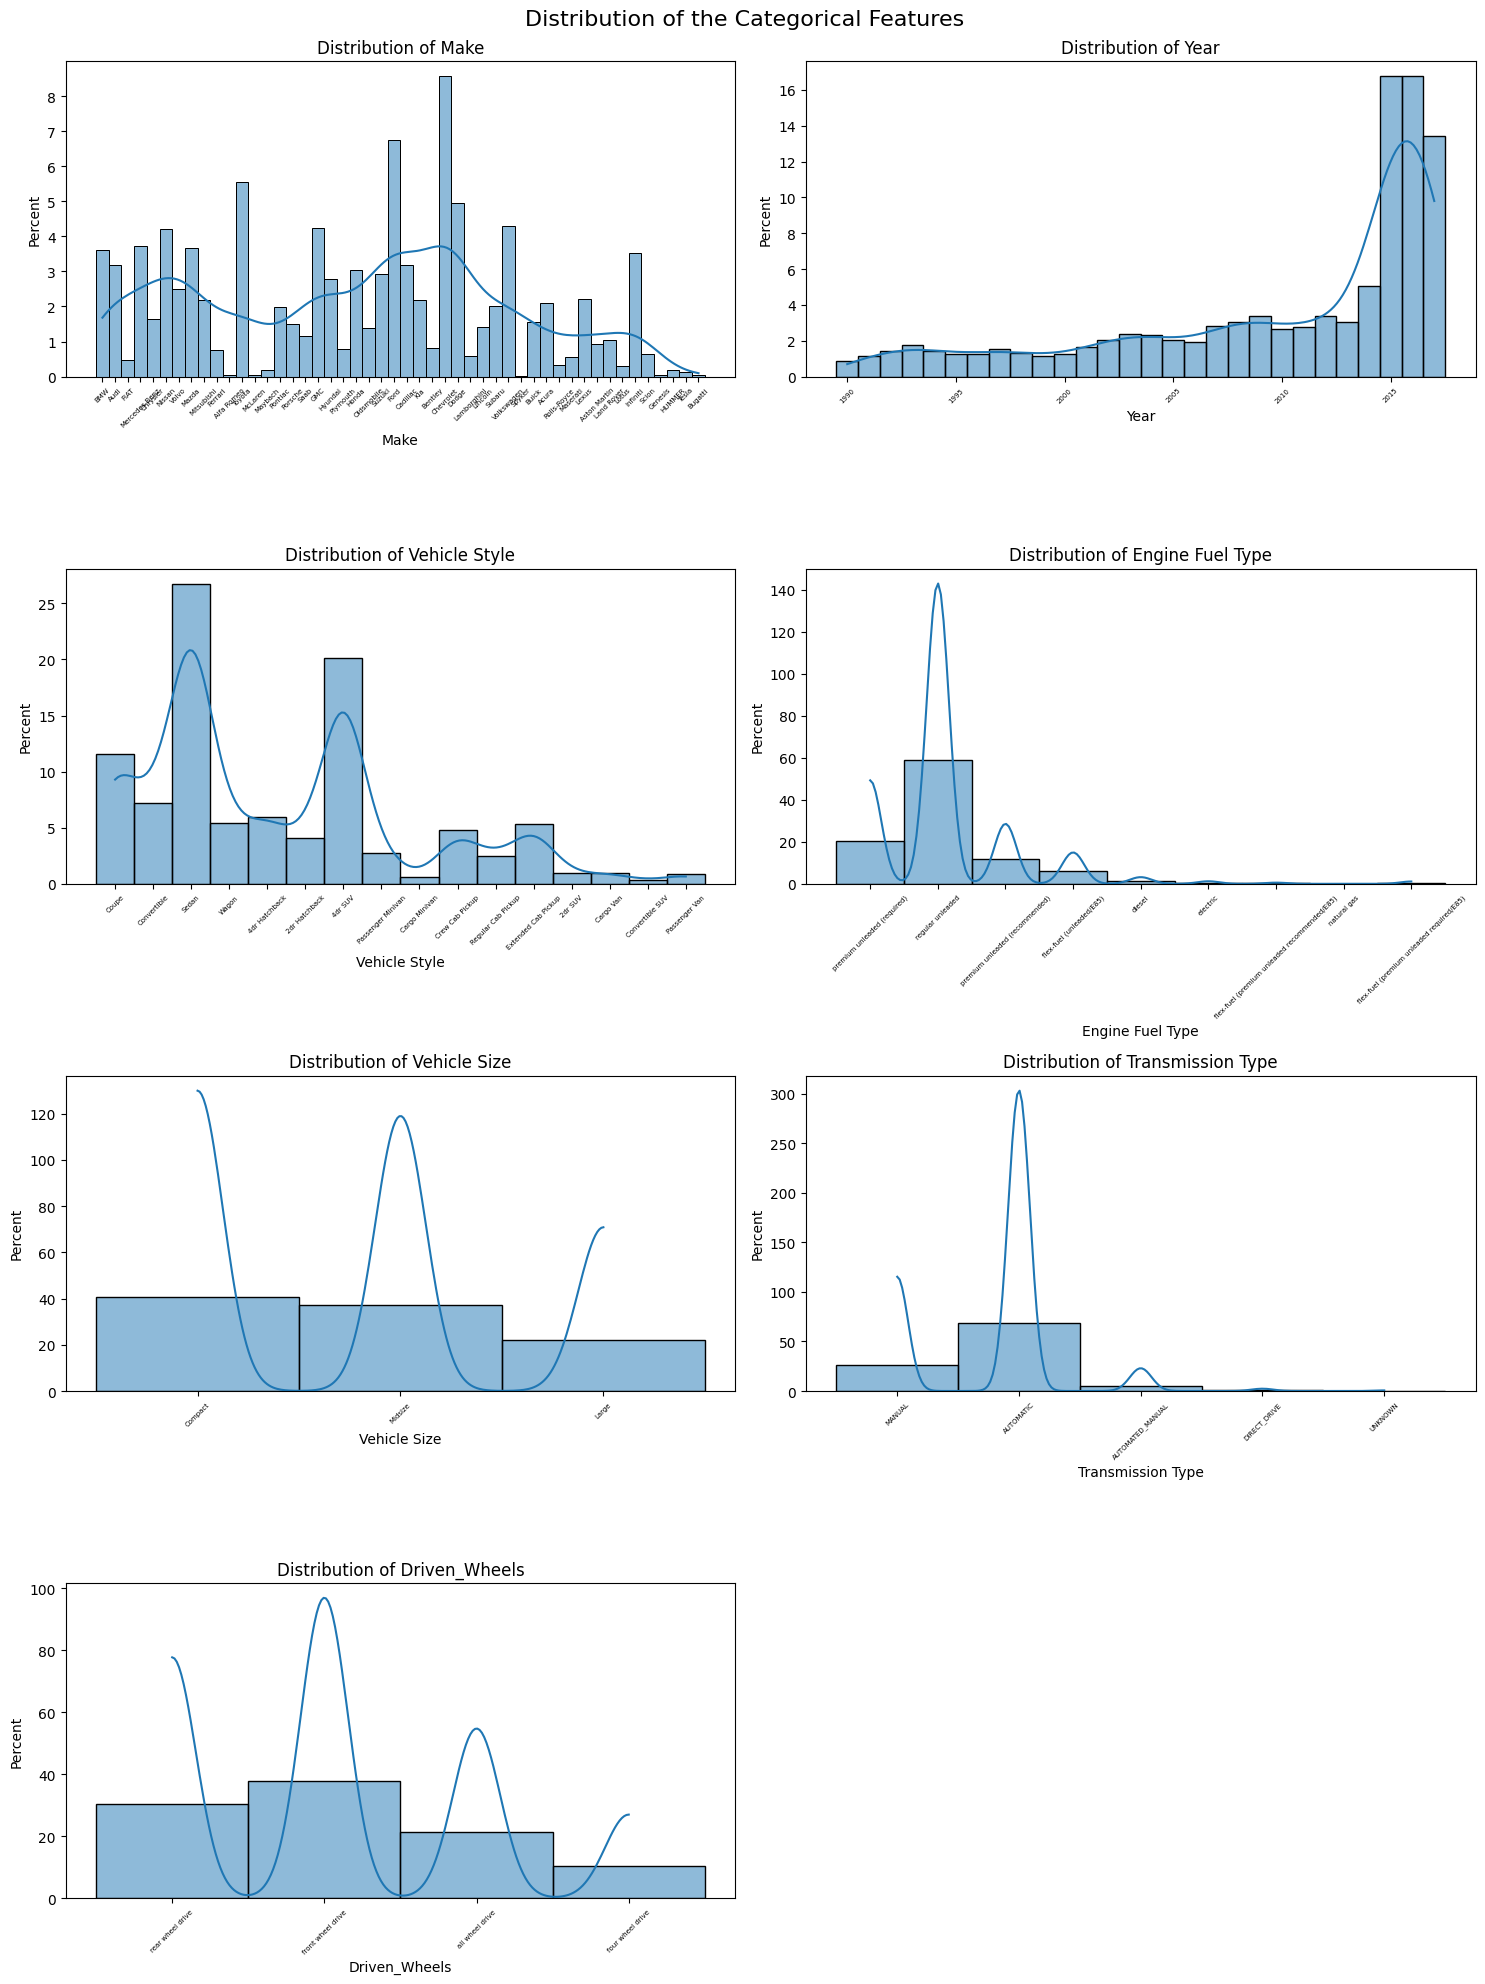

In [28]:
hist_plot_columns = ['Make', 'Year', 'Vehicle Style', 'Engine Fuel Type', 'Vehicle Size', 'Transmission Type', 'Driven_Wheels']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, column in enumerate(hist_plot_columns):
    row = i // 2
    col = i % 2
    
    sns.histplot(data=plot_data, x=column, kde=True, stat="percent", ax=axes[row, col], discrete=True)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Percent')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=5) 

if len(hist_plot_columns) < 8:
    axes[-1, -1].axis('off')

plt.suptitle('Distribution of the Categorical Features', fontsize=16, y=0.99)
plt.tight_layout()
plt.show()


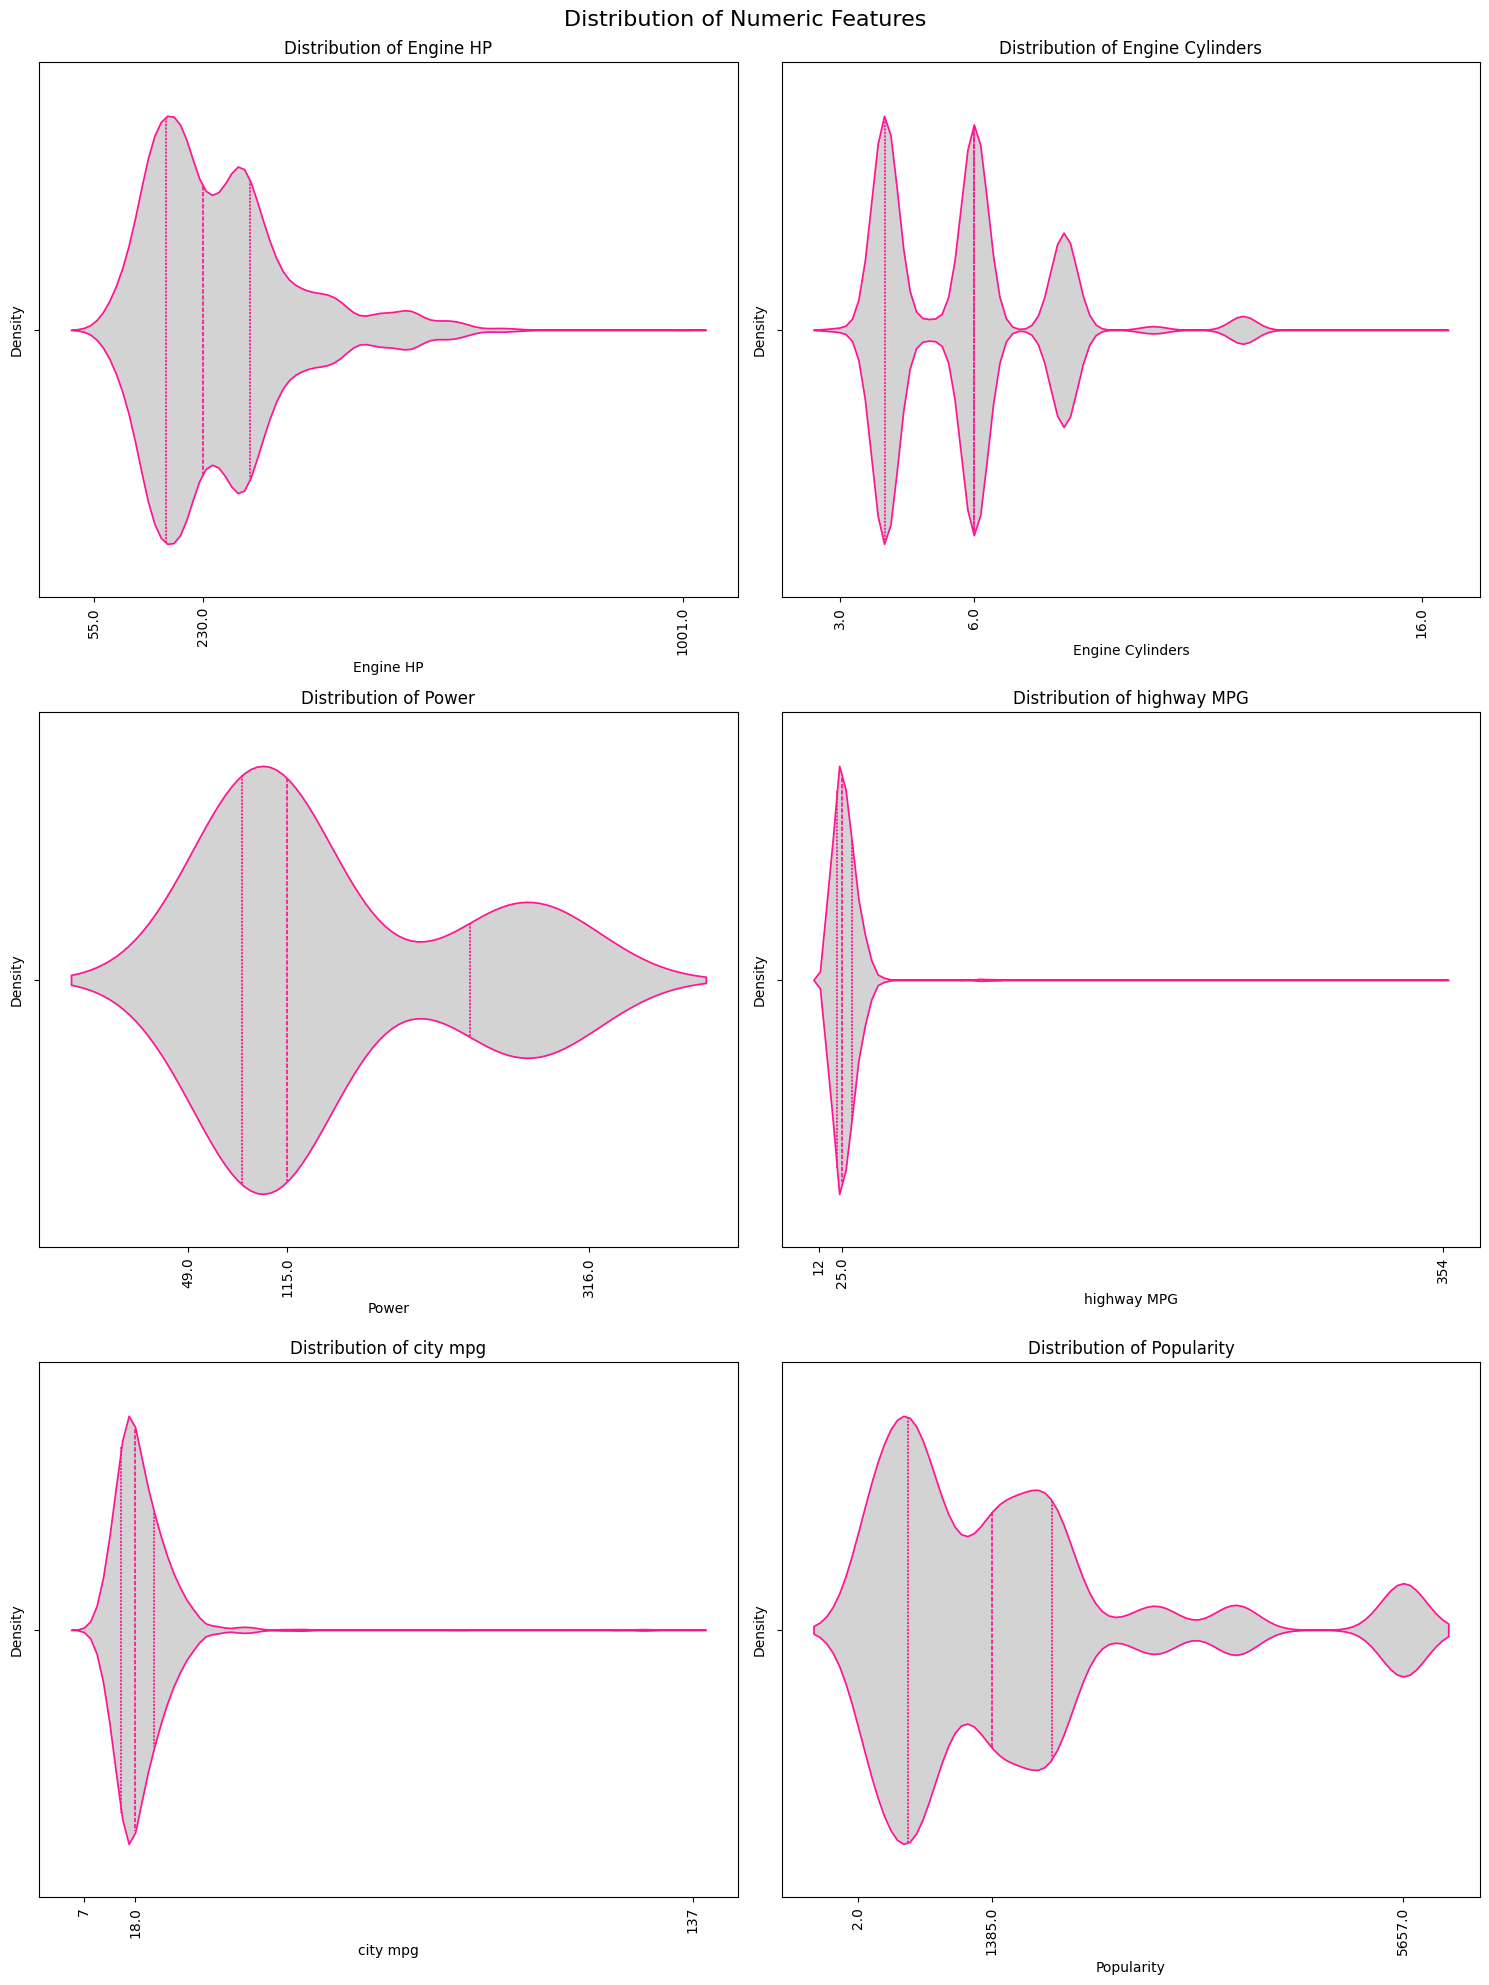

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

violin_plot_columns = ['Engine HP', 'Engine Cylinders', 'Power', 'highway MPG', 'city mpg', 'Popularity']

fig, axes = plt.subplots(3, 2, figsize=(15, 20))

for i, column in enumerate(violin_plot_columns):
    row = i // 2
    col = i % 2
    
    sns.violinplot(data=plot_data, x=column, saturation=1, inner='quart', color='lightgrey', linecolor='deeppink', density_norm='count', ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')
    axes[row, col].set_title(f'Distribution of {column}')
    
    first_value = plot_data[column].min()
    middle_value = plot_data[column].median()
    last_value = plot_data[column].max()
    axes[row, col].set_xticks([first_value, middle_value, last_value])
    axes[row, col].set_xticklabels([first_value, middle_value, last_value])

    axes[row, col].tick_params(axis='x', rotation=90)


plt.suptitle('Distribution of Numeric Features', fontsize=16,y=0.99)
plt.tight_layout()
plt.show()


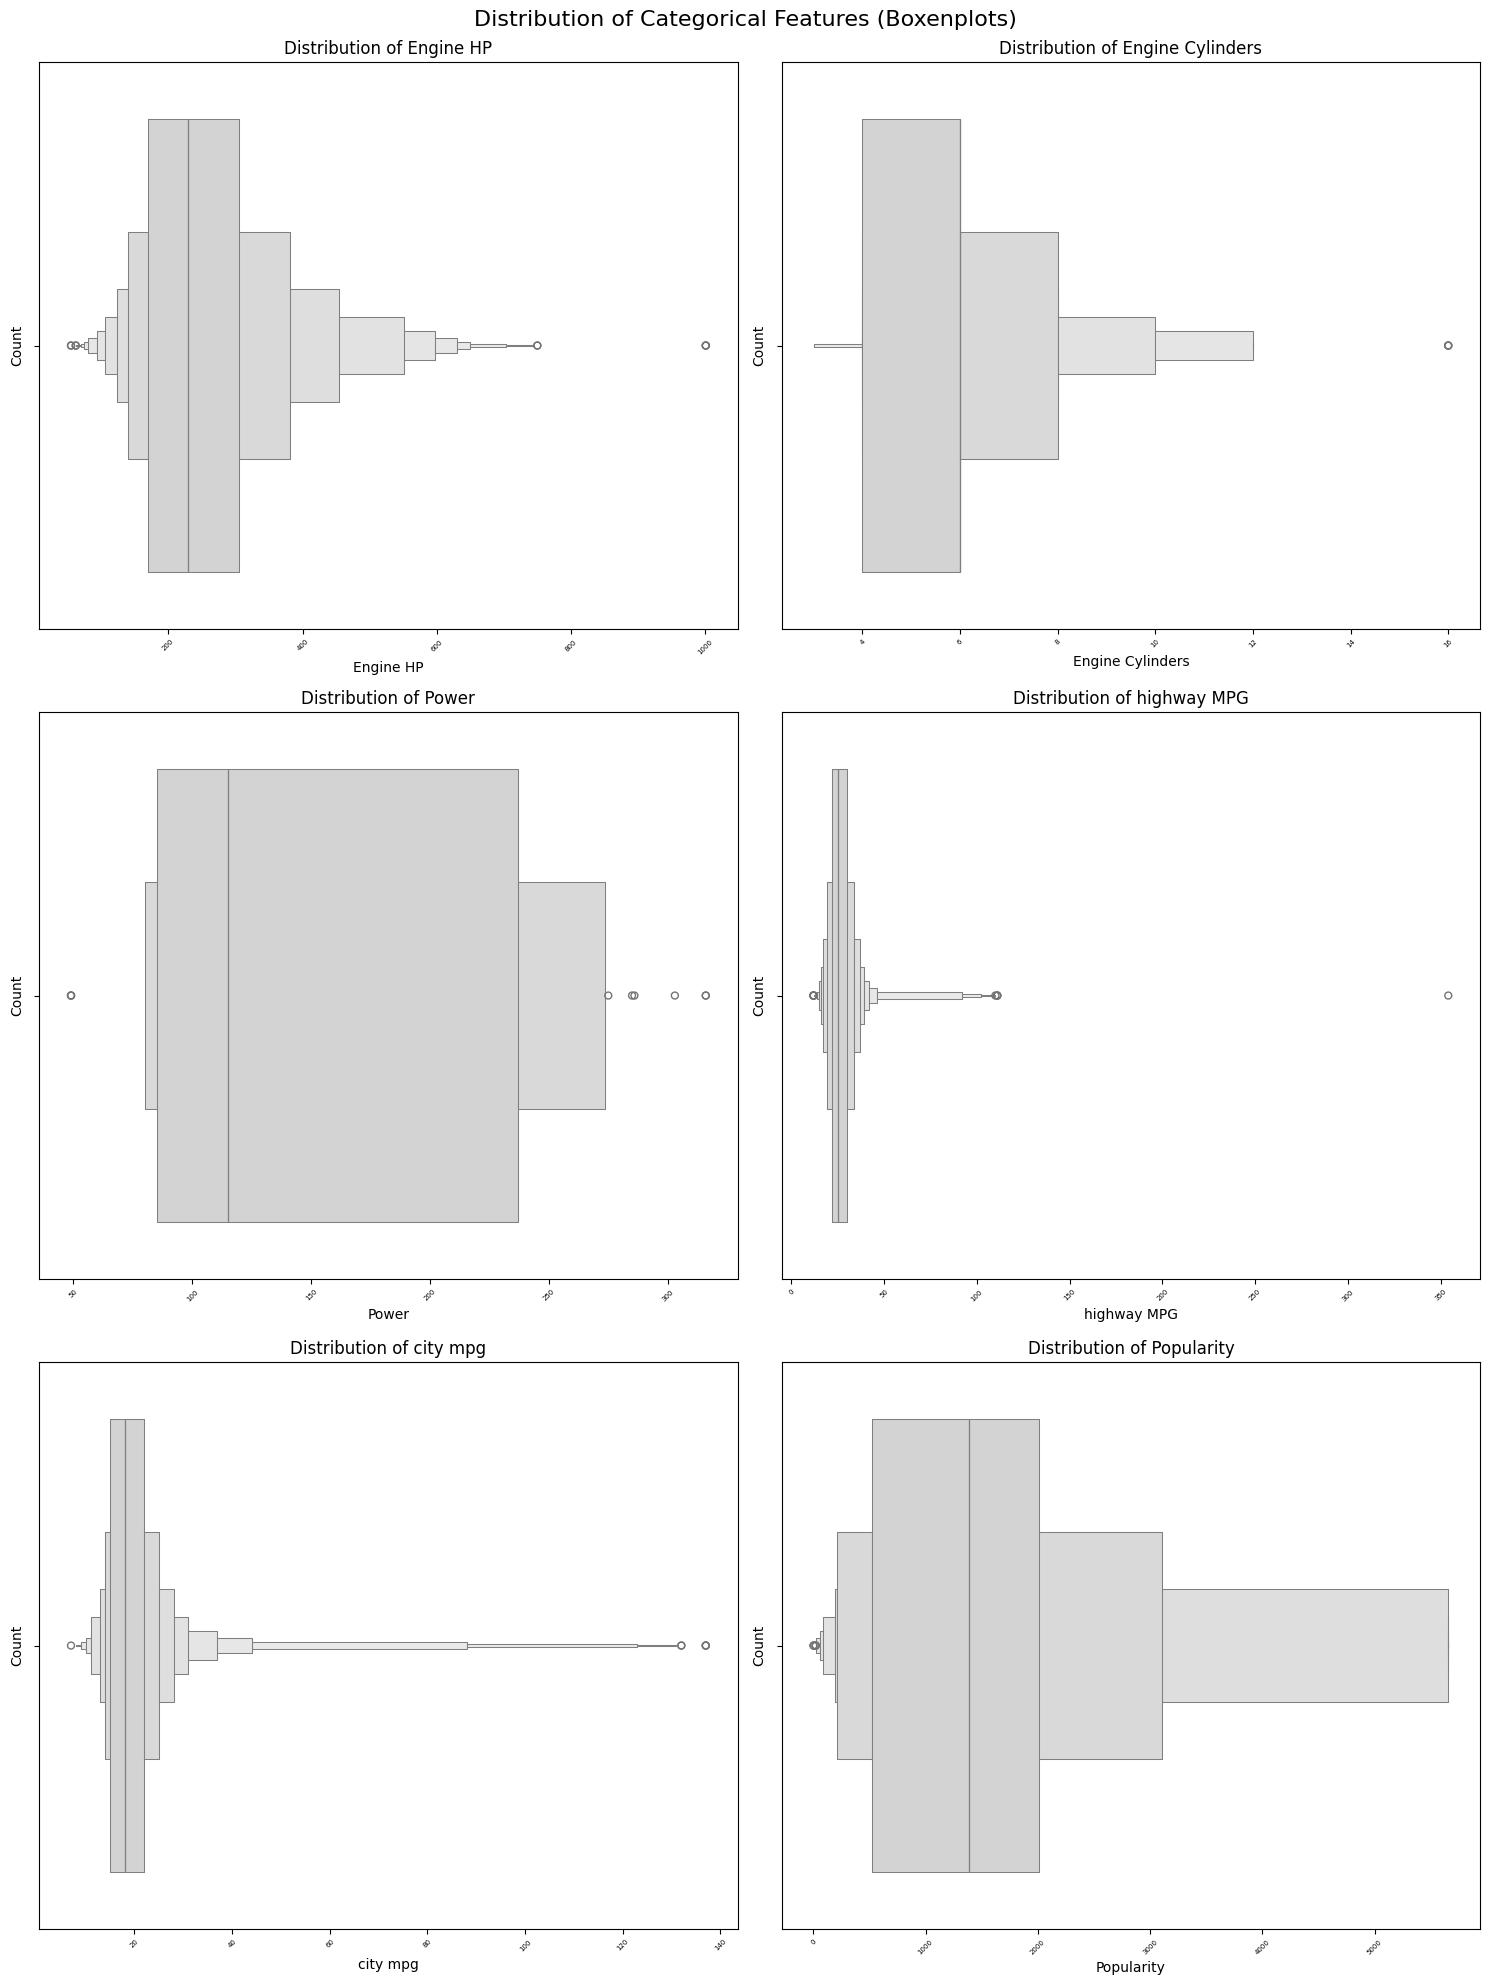

In [42]:
boxen_plot_columns = ['Engine HP', 'Engine Cylinders', 'Power', 'highway MPG', 'city mpg', 'Popularity']

fig, axes = plt.subplots(3, 2, figsize=(15, 20))

for i, column in enumerate(boxen_plot_columns):
    row = i // 2
    col = i % 2
    
    sns.boxenplot(data=plot_data, x=column, ax=axes[row, col], color='lightgrey')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=5)


plt.suptitle('Distribution of Categorical Features (Boxenplots)', fontsize=16,y=0.99)
plt.tight_layout()
plt.show()



Visualization of the Correlation between the Features and the Target

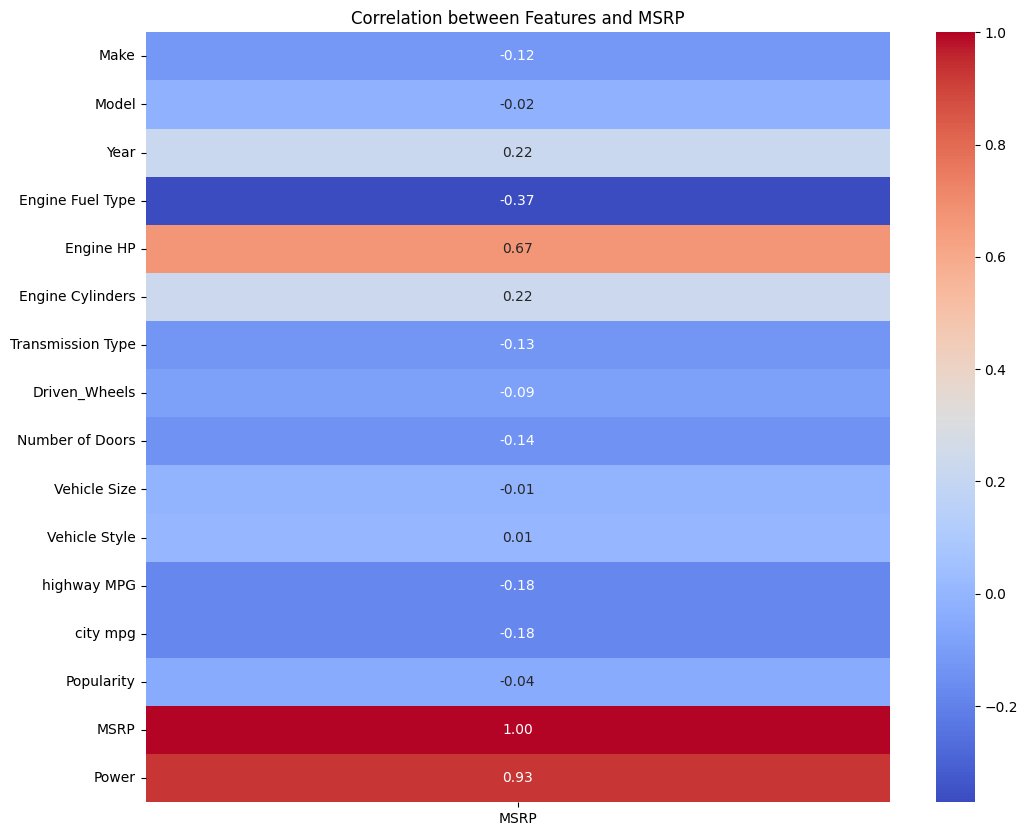

In [83]:
data = pd.read_csv('binarized_standardized_data.csv')

plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix[['MSRP']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Features and MSRP')
plt.show()